In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.set_cmap("gray") # Otherwise grayscale images look purple
%matplotlib inline

In [2]:
!curl -fsS http://udon.stacken.kth.se/\~ninjin/comp0090_assignment_1_data.tar.gz -o /tmp/data.tar.gz
!tar -x -z -f /tmp/data.tar.gz
!rm -f /tmp/data.tar.gz

The transpose here changes the shape from `(width, height, batch_size)` to `(batch_size, height, width)`

In [3]:
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz")

In [4]:
trainxs = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz").transpose((2, 1, 0))
trainys = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz").transpose((2, 1, 0))
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz").transpose((2, 1, 0))
testys  = np.load("comp0090_assignment_1_data/fashion-test-labels.npz")

In [5]:
print(trainxs.shape)
print(trainys.shape)
print(devxs.shape)
print(devys.shape)
print(testxs.shape)
print(testys.shape)

(12000, 28, 28)
(12000,)
(1000, 28, 28)
(1000,)
(1000, 28, 28)
(1000,)


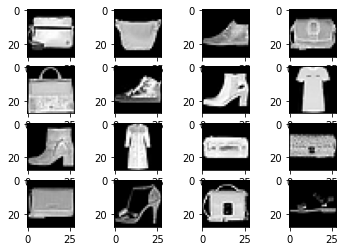

In [6]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(trainxs[np.random.randint(0, len(trainxs))])

## Reshape images

By using a column vector of size $28\times 28 = 784$, we can construct a training matrix made up of the transposed column matrices.

$$\mathcal{D} = \begin{bmatrix} \bf{x_1^T} \\ \vdots \\ \bf{x_m^T} \end{bmatrix}$$ where $$\bf{x_1} = \begin{bmatrix} x_{1, 1} \\ \vdots \\ x_{1, n} \end{bmatrix}$$

In [7]:
trainxs = trainxs.reshape(-1, 784)
devxs = devxs.reshape(-1, 784)
testxs = testxs.reshape(-1, 784)

We can then use `.reshape(28, 28)` on individual datapoints when we need to display them:

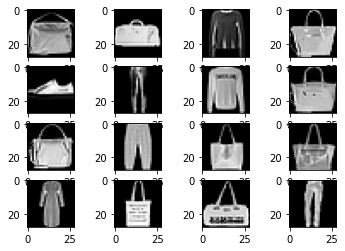

In [8]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(devxs[np.random.randint(0, len(devxs))].reshape(28, 28))

Note that test images are deliberately redacted:

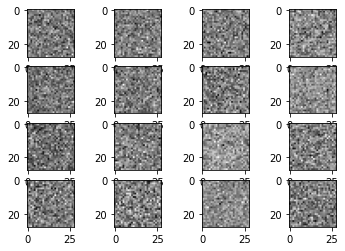

In [9]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(testxs[np.random.randint(0, len(devxs))].reshape(28, 28))